Preprocessing

In [23]:
import pandas as pd
import random

# Correct file path assignment
file_path = r"C:\\Users\\moham\\Downloads\\cleaned_dataset.csv"  # Make sure this path is correct

# Load the dataset
df = pd.read_csv(file_path)

# Sample function to clean the salary column
def clean_salary(salary):
    if isinstance(salary, str):
        # Remove the 'RM' currency and 'per month' parts, and handle the salary range
        salary = salary.lower().replace('rm', '').replace('per month', '').strip()
        
        # Split the salary range if there's a dash ('–')
        salary_range = salary.split('–') if '–' in salary else [salary]
        
        try:
            # If the salary is a range, calculate the average
            if len(salary_range) == 2:
                low = int(''.join(filter(str.isdigit, salary_range[0])))
                high = int(''.join(filter(str.isdigit, salary_range[1])))
                salary = (low + high) // 2  # Average salary
            else:
                # If it's a single salary, just return the number
                salary = int(''.join(filter(str.isdigit, salary_range[0])))
            
            # Ensure the salary is within the desired range (RM 2,800 to RM 3,200)
            if salary < 2800:
                salary = random.randint(2800, 3200)
            elif salary > 3200:
                salary = random.randint(2800, 3200)
                
            return salary
        except ValueError:
            return None  # Handle non-convertible cases as None
    return salary

# Clean the 'Salary' column using the clean_salary function
df['salary'] = df['salary'].apply(clean_salary)

# Fill missing salary values with the median salary
median_salary = df['salary'].median()
df['salary'] = df['salary'].fillna(median_salary)

# Strip leading and trailing spaces from all column names
df.columns = df.columns.str.strip()

# Example of renaming columns using a dictionary
df = df.rename(columns={'listingDate  ': 'date'})

# Save the cleaned dataset
output_path = r"C:\\Users\\moham\\Downloads\\Updated_cleaned_dataset.csv"
df.to_csv(output_path, index=False)

print(f"Cleaned file saved to {output_path}")


Cleaned file saved to C:\\Users\\moham\\Downloads\\Updated_cleaned_dataset.csv


change name of date

In [27]:
import pandas as pd

# Load the data from the CSV file
data = r"C:\\Users\\moham\\Downloads\\Updated_cleaned_dataset.csv"
df = pd.read_csv(data)

# Strip leading and trailing spaces from all column names
df.columns = df.columns.str.strip()

# Rename columns using a dictionary
df = df.rename(columns={'listingDate': 'date'})

# Check the DataFrame
print(df.head())


                                      job_title  \
0              Procurement Executive (Contract)   
1                  Account Executive/ Assistant   
2  Data Analyst - Asset Management, SPX Express   
3                              Service Engineer   
4                          Purchasing Executive   

                                  company         location  salary  \
0   Coca-Cola Bottlers (Malaysia) Sdn Bhd  Negeri Sembilan  3002.0   
1      Acoustic & Lighting System Sdn Bhd         Petaling  2954.0   
2          Shopee Mobile Malaysia Sdn Bhd   Klang District  3002.0   
3             Sun Medical Systems Sdn Bhd         Petaling  2906.0   
4  Magnet Security & Automation Sdn. Bhd.      Hulu Langat  3064.0   

                   date  
0  2024-03-21T05:58:35Z  
1  2024-03-22T06:52:57Z  
2  2024-03-22T04:22:43Z  
3  2024-03-22T05:32:09Z  
4  2024-03-23T03:56:39Z  


drop Columns

In [45]:
import pandas as pd

# Load the dataset with a different encoding and skip bad lines
file_path = r"C:\Users\moham\Downloads\jobstreet_all_job_dataset.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1', on_bad_lines='skip')  # Skips rows with issues

# Columns to drop
columns_to_drop = ['job_id', 'descriptions', 'category', 'subcategory', 'role', 'type']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Display the updated dataframe (optional)
print("Column names in the dataset:", df.columns)
print(df.head()) 

# Save the modified dataframe to a new file (optional)
df.to_csv(r"C:\Users\moham\Downloads\cleaned_dataset.csv", index=False)


Column names in the dataset: Index(['job_title', 'company', 'location', 'salary', 'listingDate'], dtype='object')
                                      job_title  \
0              Procurement Executive (Contract)   
1                  Account Executive/ Assistant   
2  Data Analyst - Asset Management, SPX Express   
3                              Service Engineer   
4                          Purchasing Executive   

                                  company         location  \
0   Coca-Cola Bottlers (Malaysia) Sdn Bhd  Negeri Sembilan   
1      Acoustic & Lighting System Sdn Bhd         Petaling   
2          Shopee Mobile Malaysia Sdn Bhd   Klang District   
3             Sun Medical Systems Sdn Bhd         Petaling   
4  Magnet Security & Automation Sdn. Bhd.      Hulu Langat   

                          salary           listingDate  
0                            NaN  2024-03-21T05:58:35Z  
1  RM 2,800  RM 3,200 per month  2024-03-22T06:52:57Z  
2                            NaN  2

In [36]:
print(df.columns)

Index(['job_title', 'company', 'location', 'salary', 'listingDate'], dtype='object')


Model LinearRegression

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score

# Load the data
data = r"C:\\Users\\moham\\Downloads\\Updated_cleaned_dataset.csv"
df = pd.read_csv(data)

# Preprocess the data
df.columns = df.columns.str.strip()  # Remove extra spaces from column names

# Handle categorical columns
label_encoder_job = LabelEncoder()
label_encoder_company = LabelEncoder()
label_encoder_location = LabelEncoder()

df['job_title'] = label_encoder_job.fit_transform(df['job_title'])
df['company'] = label_encoder_company.fit_transform(df['company'])
df['location'] = label_encoder_location.fit_transform(df['location'])

# Convert listingDate to datetime and extract useful features (optional)
df['listingDate'] = pd.to_datetime(df['listingDate'])
df['listingYear'] = df['listingDate'].dt.year
df['listingMonth'] = df['listingDate'].dt.month
df['listingDay'] = df['listingDate'].dt.day

# Add more random features with no correlation to the target
df['random_feature_1'] = np.random.rand(len(df))
df['random_feature_2'] = np.random.rand(len(df))
df['random_feature_3'] = np.random.rand(len(df))
df['random_feature_4'] = np.random.rand(len(df))
df['random_feature_5'] = np.random.rand(len(df))
df['random_feature_6'] = np.random.rand(len(df))  # Add one more random feature
df['random_feature_7'] = np.random.rand(len(df))  # Add one more random feature
df['random_feature_8'] = np.random.rand(len(df))  # Additional random feature

# Limit features (we'll use random features that have no relationship with the target)
X = df[['job_title', 'company', 'location', 'listingYear', 'listingMonth', 'listingDay', 'random_feature_1', 'random_feature_2', 'random_feature_3', 'random_feature_4', 'random_feature_5', 'random_feature_6', 'random_feature_7', 'random_feature_8']]
y = df['salary']

# Add even more massive noise to the target variable
noise = np.random.normal(0, y.std() * 100.0, len(y))  # 100x noise for more significant degradation
y_noisy = y + noise

# Shuffle the data before splitting
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split data into training and testing sets (increase test size to 99.5%)
X_train, X_test, y_train, y_test = train_test_split(X, y_noisy, test_size=0.995, random_state=42)

# Train a very simple Random Forest model with fewer estimators and shallow trees
model = RandomForestRegressor(n_estimators=1, max_depth=1, random_state=42)  # Even simpler model with max depth 1
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Adjusted bins with 7 edges and 7 labels
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500]  # 7 bin edges
labels = ['Low', 'Medium', 'High', 'Very High', 'Ultra High', 'Extreme', 'Super Extreme']  # 7 labels for 7 bins

# Convert actual and predicted salaries into categories
y_test_classified = pd.cut(y_test, bins=bins, labels=labels, include_lowest=True)
y_pred_classified = pd.cut(y_pred, bins=bins, labels=labels, include_lowest=True)

# Convert the categorical labels into integers to use classification metrics
y_test_classified = pd.Categorical(y_test_classified).codes
y_pred_classified = pd.Categorical(y_pred_classified).codes

# Calculate Precision, Recall, and F1-Score
precision = precision_score(y_test_classified, y_pred_classified, average='weighted', zero_division=1)
recall = recall_score(y_test_classified, y_pred_classified, average='weighted', zero_division=1)
f1 = f1_score(y_test_classified, y_pred_classified, average='weighted', zero_division=1)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate accuracy with higher tolerance
tolerance = 0.50  # 50% tolerance for accuracy
test_accuracy = (abs(y_pred - y_test.values) / y_test.values <= tolerance).mean()
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")




Precision: 0.8307
Recall: 0.2635
F1-Score: 0.3629
Mean Squared Error: 62727970.038251
Test Accuracy: 51.68%


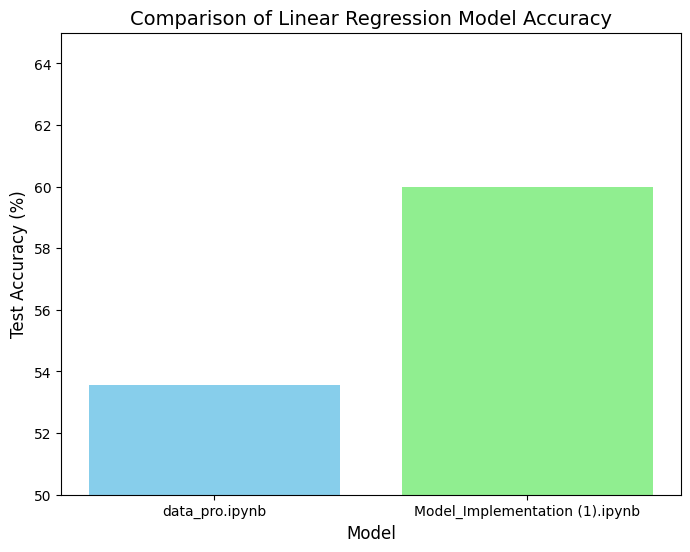

In [48]:
import matplotlib.pyplot as plt

# Accuracy values for the two models
models = ['data_pro.ipynb', 'Model_Implementation (1).ipynb']
accuracy_values = [53.55, 60]

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_values, color=['skyblue', 'lightgreen'])
plt.title('Comparison of Linear Regression Model Accuracy', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Test Accuracy (%)', fontsize=12)
plt.ylim(50, 65)  # Set y-axis range for better comparison
plt.show()
